# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 - Consumer benefit: With accurate predictions of used car prices, consumers can make informed decisions while purchasing or selling used cars. They can ensure they are not overpaying or underselling, and they can budget appropriately for their purchase.
 - Economic indicator: The used car market can also serve as an economic indicator, as changes in used car prices can reflect broader economic trends. This is something we are seeing in the current year, as used price cars are used to measure how the inflaction is affecting the economy.
 - Finance and Insurance: Financial institutions can use these predictions to make decisions about car loans or insurance pricing.
 - Demographic information: The data can also be used to understand the demographics of the used car market, it could help us to identify patterns in the india population based on the model each city uses or the price they are willing to pay for a car.


### **The objective:**

 - What is the intended goal?

To accurately predict the sale price of a used car based on various features.

### **The key questions:**

- What are the key questions that need to be answered?

- Which features have the most impact on the selling price of a used car?
- How accurately can we predict the selling price of a used car?
- What will be the selling price of a used car given specific features such as make, model, age, mileage, condition, etc.?
- What is the best predictive model for this task?
- How reliable or robust is the model to changes in the data? 
- What are the trends in the used car market in India? For example, which car models tend to retain their value?


### **The problem formulation**:

- What is it that we are trying to solve using data science?

Specifically, we want to build a model that can predict the selling price of used cars in India based on various features such as car make and model, age, mileage, fuel type, transmission type, and potentially other characteristics available in the dataset.

Since the selling price of a used car is a continuous variable, this is a regression problem.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### **Let us load the data**

In [175]:
# Reading the dataset
raw_data = pd.read_csv("used_cars.csv")
df = raw_data.copy()

In [176]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


#### Observations:

The used cars price prediction target variable is Price and the rest of the variables are independent variables based on which I will predict the final Price of the used cars.

## Data Overview

- Observations
- Sanity checks

In [177]:
# Data shape
df.shape

(7253, 14)

Observations:

The data has 7253 rows and 14 columns.

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


Observations:
- There are 5 categorical columns and 11 numerical columns.
- Columns Mileage, Engine, Power, seats, New_Price and Price have missing values.


In [179]:
# Checking for null values
df.isnull().sum() 

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [180]:
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result with two decimals
print("Percentage of null values in each column:")
print(null_percentage.apply(lambda x: "{:.2f}%".format(x)))

Percentage of null values in each column:
S.No.                 0.00%
Name                  0.00%
Location              0.00%
Year                  0.00%
Kilometers_Driven     0.00%
Fuel_Type             0.00%
Transmission          0.00%
Owner_Type            0.00%
Mileage               0.03%
Engine                0.63%
Power                 2.41%
Seats                 0.73%
New_price            86.13%
Price                17.01%
dtype: object


Obersvations:
There are several columns with missing values.
- Column New_Price has 6247 missing values.
- Column Seats has 53 missing values.
- Column Engine has 46 missing values.
- Column Power has 175 missing values.
- Column Mileage has 2 missing values.
- Column Price has 1234 missing values.

Due to the large number of missing values in New_Price column (86% of the values), we will drop this column. We will also take care of the missing values in the other columns.
Column S.No. is just an index column, so we will drop it as well.

In [181]:
#Dropping the columns with more than 50% null values
df.drop(["New_price"], axis=1, inplace=True)
#Additionally, we are going to drop column S.No. as it is not useful for our analysis
df.drop(["S.No."], axis=1, inplace=True)

In [182]:
# Get the number of unique values for each column
unique_counts = df.nunique()
print("Number of unique values for each column:")
print(unique_counts)

Number of unique values for each column:
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
Price                1373
dtype: int64


In [183]:
# Check for duplicate rows and store them in a separate DataFrame
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

if num_duplicate_rows > 0:
    print("Number of duplicate rows found:", num_duplicate_rows)
    # Drop duplicates and keep the first occurrence (you can change to "last" if needed)
    df.drop_duplicates(keep="first", inplace=True)
    print("Duplicate rows removed. DataFrame updated.")
    
    # Display the rows that were dropped
    print("Rows that were dropped:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the DataFrame.")

Number of duplicate rows found: 1
Duplicate rows removed. DataFrame updated.
Rows that were dropped:
                     Name Location  Year  Kilometers_Driven Fuel_Type  \
6582  Honda City 1.5 E MT   Mumbai  2010              52000    Petrol   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  
6582       Manual      First     17.0  1497.0  118.0    5.0    NaN  


We remove the row 6582 because it is a duplicate of row 6581

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

Summary statistic for the numerical variables

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.365830,3.254405,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7252.0,58699.986900,84433.505524,171.00,34000.00,53429.00,73000.00,6500000.00
Mileage,7250.0,18.141738,4.562492,0.00,15.17,18.16,21.10,33.54
Engine,7206.0,1616.590064,595.324779,72.00,1198.00,1493.00,1968.00,5998.00
Power,7077.0,112.764474,53.497297,34.20,75.00,94.00,138.10,616.00
Seats,7199.0,5.280456,0.809327,2.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


Observations:
- The average year of manufacture of the cars is 2013 with standard deviation of 3.2 years.
- The average kilometers driven is 58699 with standard deviation of 84427. The maximum kilometers driven is 6.5 million.
- The average mileage is 18.1 kmpl with standard deviation of 4.6. The maximum mileage is 33 kmpl.
- The average engine displacement is 1616 cc with standard deviation of 595 cc. The maximum engine displacement is 5998 cc.
- The average power is 113 bhp with standard deviation of 53 bhp. The maximum power is 616 bhp.
- The average number of seats is 5.28 with standard deviation of 0.8. The maximum number of seats is 10.
- The average price is 9.47 lakhs with standard deviation of 11.188 lakhs. The maximum price is 160 lakhs.


Summary of statistics for the categorical variables

In [185]:
categorical_columns = ["Location","Fuel_Type","Transmission","Owner_Type"]

In [186]:
for column in categorical_columns:
    frequency_table = df[column].value_counts()
    print(f"For categorical variable \n{frequency_table} \n")

For categorical variable 
Location
Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64 

For categorical variable 
Fuel_Type
Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64 

For categorical variable 
Transmission
Manual       5203
Automatic    2049
Name: count, dtype: int64 

For categorical variable 
Owner_Type
First             5951
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64 



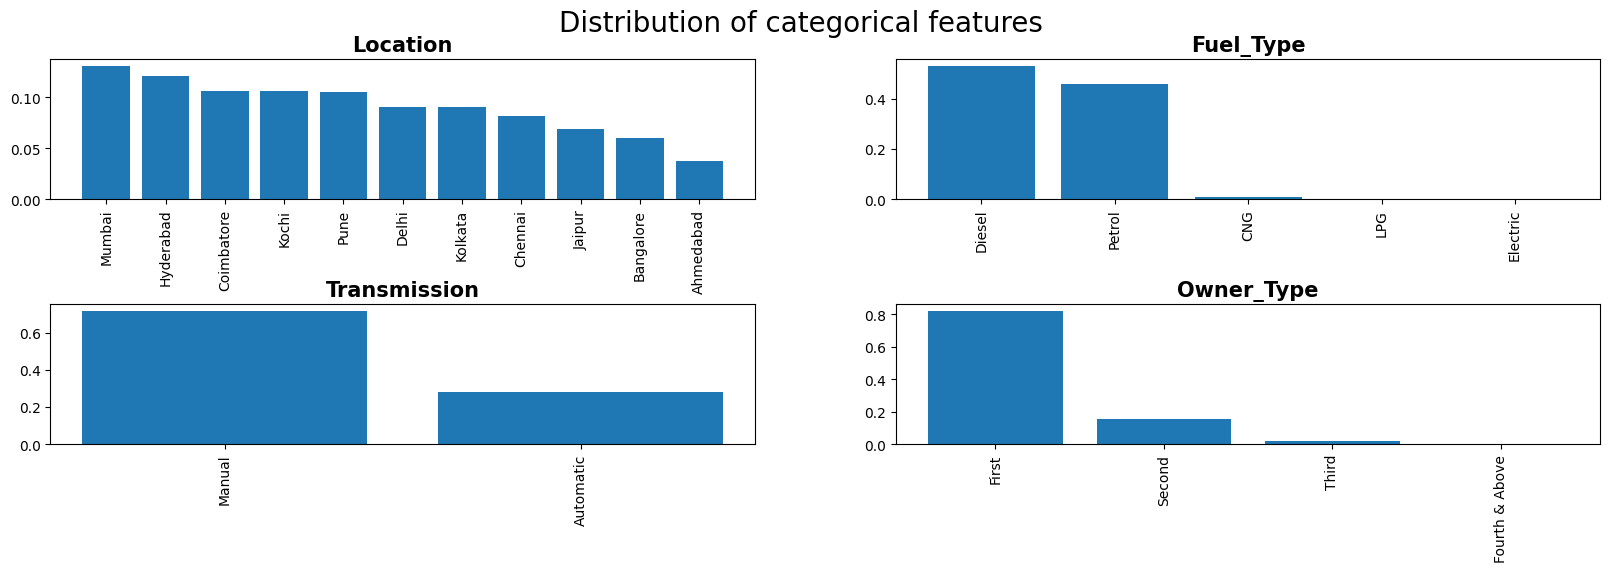

In [187]:
fig, ax = plt.subplots(2, 2, figsize=(20, 5))
fig.suptitle("Distribution of categorical features", fontsize=20)
for column in categorical_columns:
    percentage_distribution = df[column].value_counts(normalize=True)
    ax[categorical_columns.index(column) // 2][categorical_columns.index(column) % 2].bar(percentage_distribution.index, percentage_distribution.values)
    ax[categorical_columns.index(column) // 2][categorical_columns.index(column) % 2].set_title(column, fontsize=15, fontweight="bold")
    ax[categorical_columns.index(column) // 2][categorical_columns.index(column) % 2]
    ax[categorical_columns.index(column) // 2][categorical_columns.index(column) % 2]
    ax[categorical_columns.index(column) // 2][categorical_columns.index(column) % 2].tick_params(axis="x", labelrotation=90)
plt.subplots_adjust(hspace=0.75)
plt.show()

In [188]:
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    print(f"Mode value for {column} is {mode_value}")

Mode value for Location is Mumbai
Mode value for Fuel_Type is Diesel
Mode value for Transmission is Manual
Mode value for Owner_Type is First


After perfoming the above steps, we have the following observation of the distribution of the categorical variables:
1. The distribution of the categorical variables is not uniform.
2. The mode of the categorical variables is the most frequent value in the distribution. In the case of this dataset the mode is the value referred below:
    - Location: Mumbai
    - Fuel_Type: Diesel
    - Transmission: Manual
    - Owner_Type: First


Unique values for categorical variables analysis

In [189]:
# Unique values of Categorical Features
for column in categorical_columns:
    print(f"Unique values of {column}:", df[column].unique())

Unique values of Location: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Unique values of Fuel_Type: ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Unique values of Transmission: ['Manual' 'Automatic']
Unique values of Owner_Type: ['First' 'Second' 'Fourth & Above' 'Third']


After observing the unique values for the categorical features, we can see that the number of unique values for the categorical features are not too many. So, we can use one hot encoding to convert the categorical features to numerical features due to we have a small number of categorical variables. Additionally, we can provide some insights of the data:
- The location of the cars is more or less evenly distributed between the different cities. Being the city of Mumbai the one with the highest number of cars.
- Regarding fuel type, the majority of the cars are diesel, followed by petrol. The other fuel types are not very common.
- The transmission type is heavely dominated by manual transmission, with only around a 20% of automatic transmission.
- The owner type is heavely dominated by first owner, with only around a 20% of second owner. The other owner types are not very common.

Extreme values or outliers analysis

In [190]:
# First, we are going to calculate the Z-score for each numeric column in the dataset.
# We will use the Z-score to detect outliers in the dataset.
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
outliers_z_score = []
for column in numeric_columns:
    z_scores = stats.zscore(df[column])
    z_scores_greater_than_2 = z_scores[z_scores > 2]
    outliers_z_score.append(z_scores_greater_than_2)
    print("Column Name: ", column)
    print("Number of outliers: ", len(z_scores_greater_than_2))

   

Column Name:  Year
Number of outliers:  0
Column Name:  Kilometers_Driven
Number of outliers:  24
Column Name:  Mileage
Number of outliers:  0
Column Name:  Engine
Number of outliers:  0
Column Name:  Power
Number of outliers:  0
Column Name:  Seats
Number of outliers:  0
Column Name:  Price
Number of outliers:  0


In [191]:
# Outliers using Z-score method
outliers = []
for column in numeric_columns:
    z_scores = stats.zscore(df[column])
    num_outliers = len(z_scores[abs(z_scores) > 3])  
    outliers.append({"Feature": column, "Number of outliers": num_outliers})

outliers_df_z_score = pd.DataFrame(outliers, columns=["Feature", "Number of outliers"])
outliers_df_z_score

,Feature,Number of outliers
0,Year,58
1,Kilometers_Driven,8
2,Mileage,0
3,Engine,0
4,Power,0
5,Seats,0
6,Price,0


In [192]:
#Now, let´s apply a different technique the interquartile range (IQR) to identify the outliers.
outliers = []
for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1 #Interquartile range  
    fence_low  = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)
    num_outilers = df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]
    outliers.append({"Feature": column, "Number of outliers": num_outilers})
outliers_df = pd.DataFrame(outliers, columns = ["Feature", "Number of outliers"])
outliers_df

,Feature,Number of outliers
0,Year,58
1,Kilometers_Driven,258
2,Mileage,99
3,Engine,65
4,Power,273
5,Seats,1152
6,Price,718


After applying two techniques to identify the outliers, these are my observations:
- The number of outliers identified by the two techniques are different.
- For a threshold of 3, applying the Z-score technique, just the columns year and kilometers_driven have outliers.
- Meanwhile, applying the IQR technique, all the columns have outliers.
- In this case Seats column is the one that has the most outliers.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

Numerical univariate analysis of the features

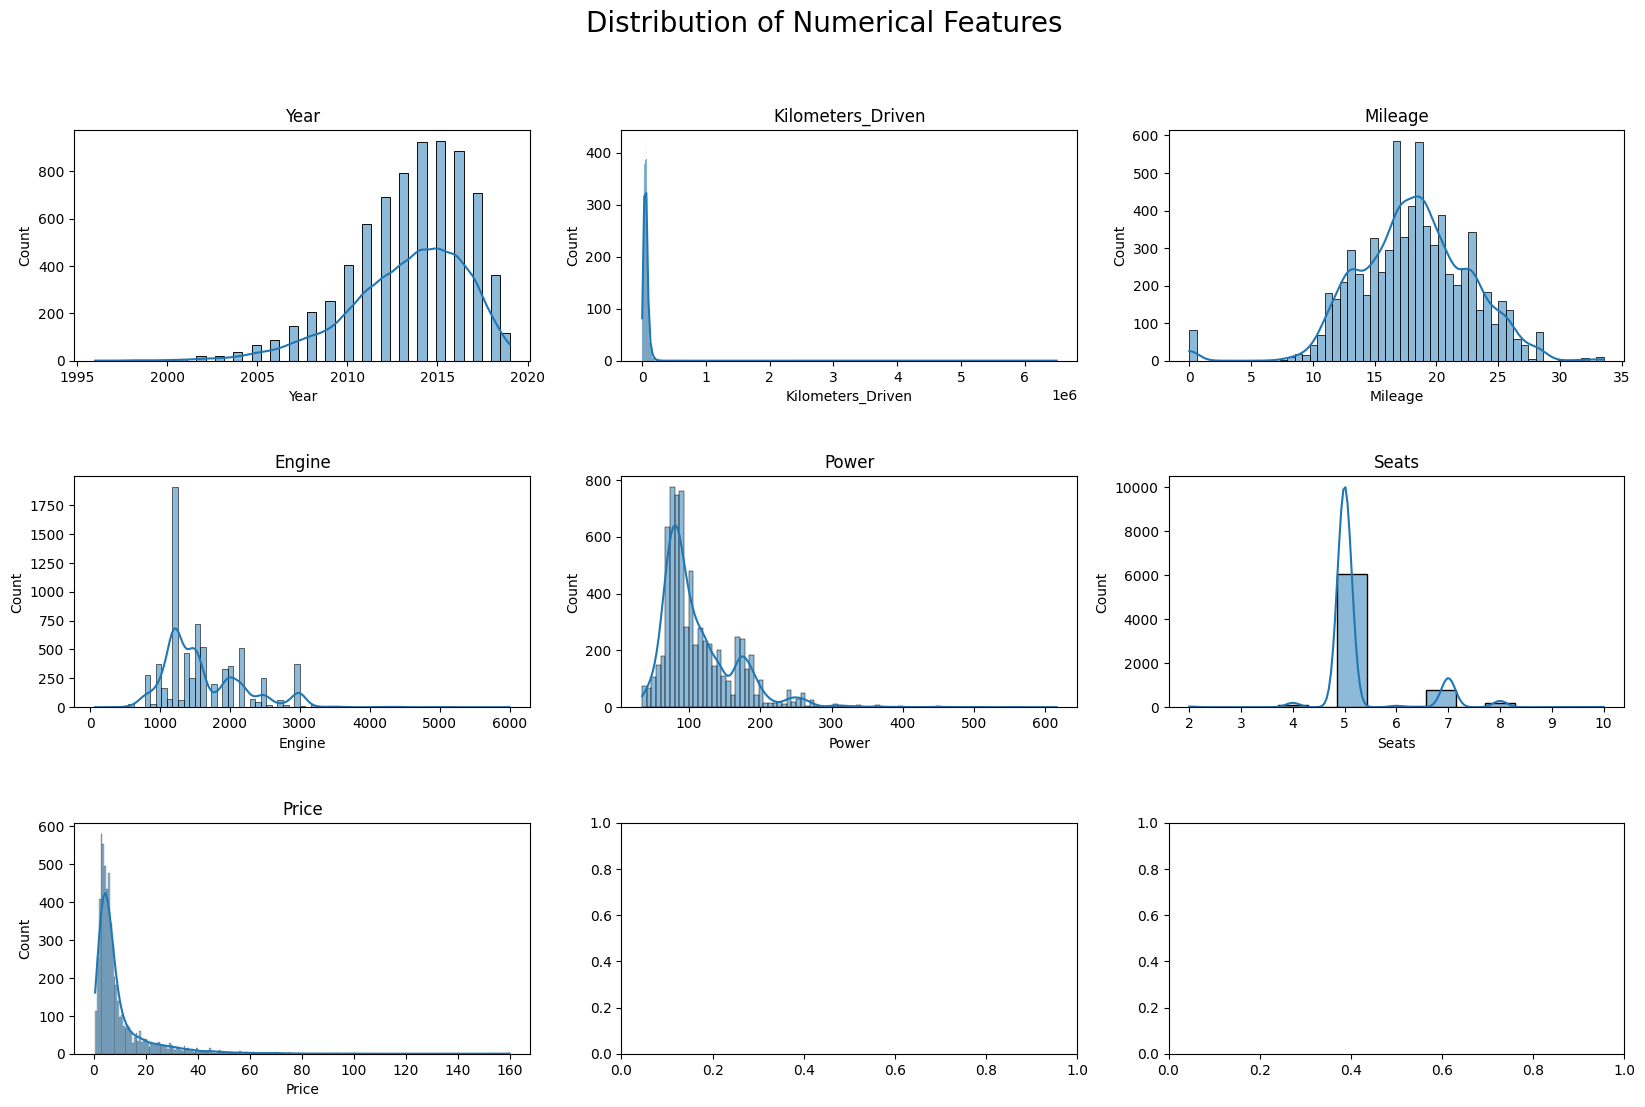

In [193]:
fig, ax = plt.subplots(3,3 ,figsize=(20, 12))
fig.suptitle("Distribution of Numerical Features", fontsize=20)
for i, variable in enumerate(numeric_columns):
    row = i // 3 
    col = i % 3
    sns.histplot(data=df, x=variable, ax=ax[row][col], kde=True).set_title(variable)

plt.subplots_adjust(hspace=0.5)
plt.show()

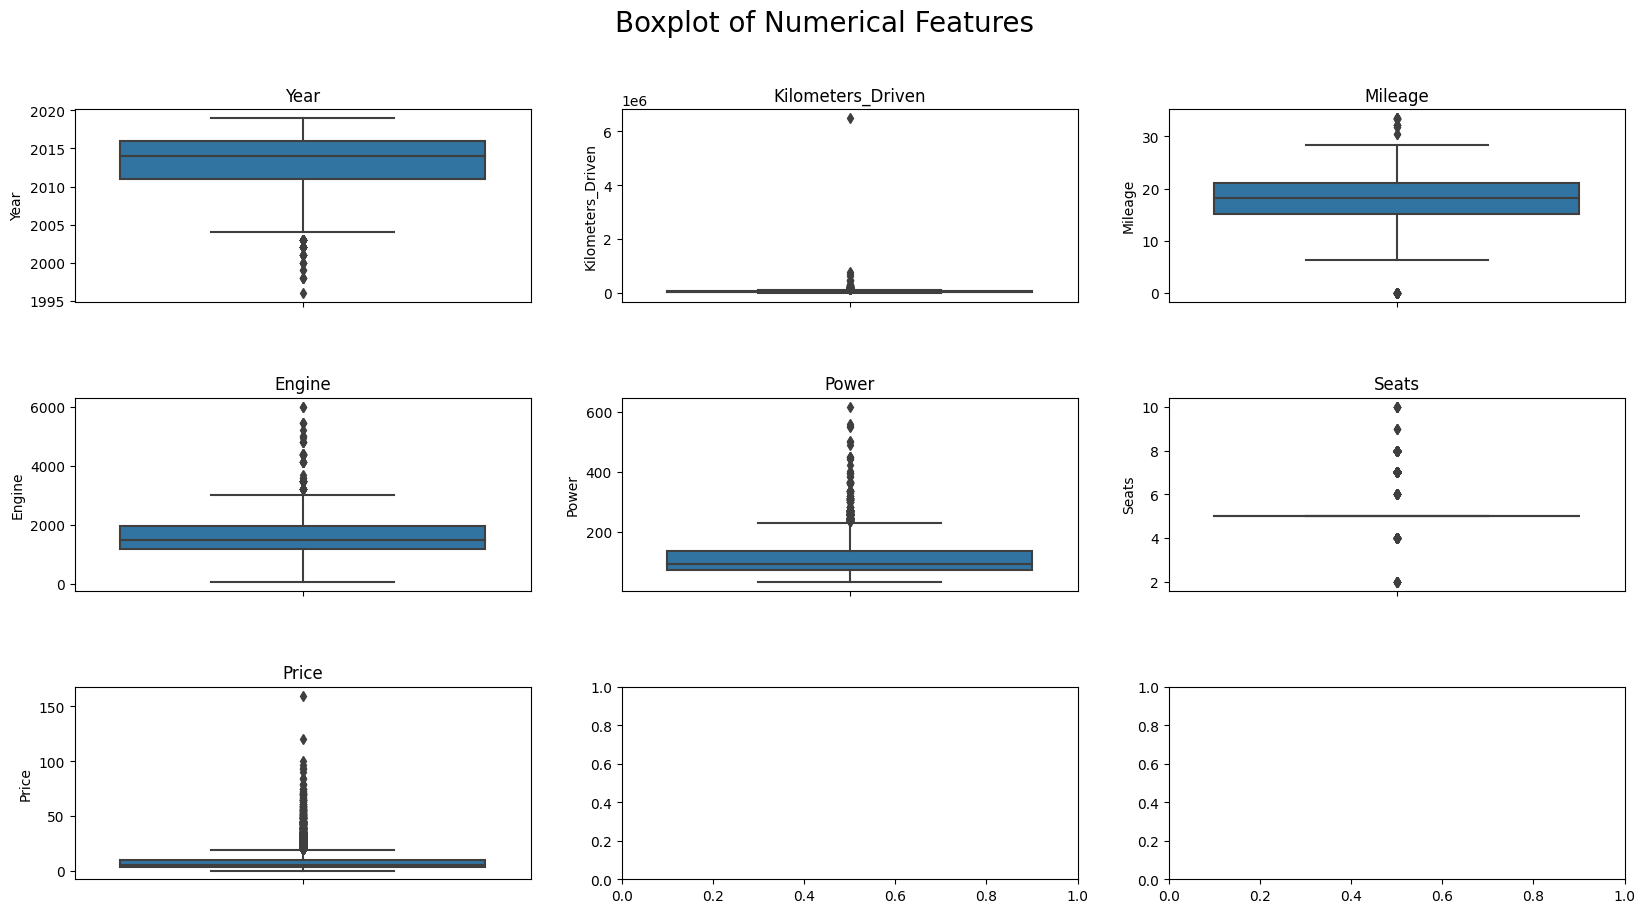

In [194]:
fig, ax = plt.subplots(3,3, figsize=(20, 10))
fig.suptitle("Boxplot of Numerical Features", fontsize=20)
for i, variable in enumerate(numeric_columns):
    sns.boxplot(y=variable, data=df, ax=ax[i//3][i%3]).set_title(variable)

plt.subplots_adjust(hspace=0.5)
plt.show()

#### Observations
- The variable Year is uniformly distributed across the dataset. Slightly skewed towards the left. We can identify that there are outliers in the boxplot
- Kilometers_Driven is right skewed. There are outliers in the boxplot
- Mileage is uniformly distributed across the dataset. Slightly skewed towards the right. We can identify that there are outliers in the boxplot
- Engine is not uniformly distributed across the dataset with some extreme values- outliers in the boxplot
- Power is uniformly distributed across the dataset. Skiwed towards the right. We can identify that there are outliers in the boxplot
- The majority of the cars have 5 seats but we can see some outliers in the boxplot which represent those cars with more or less than 5 seats
- Price is right skewed. There are many outliers in the boxplot


Categorical univariate analysis

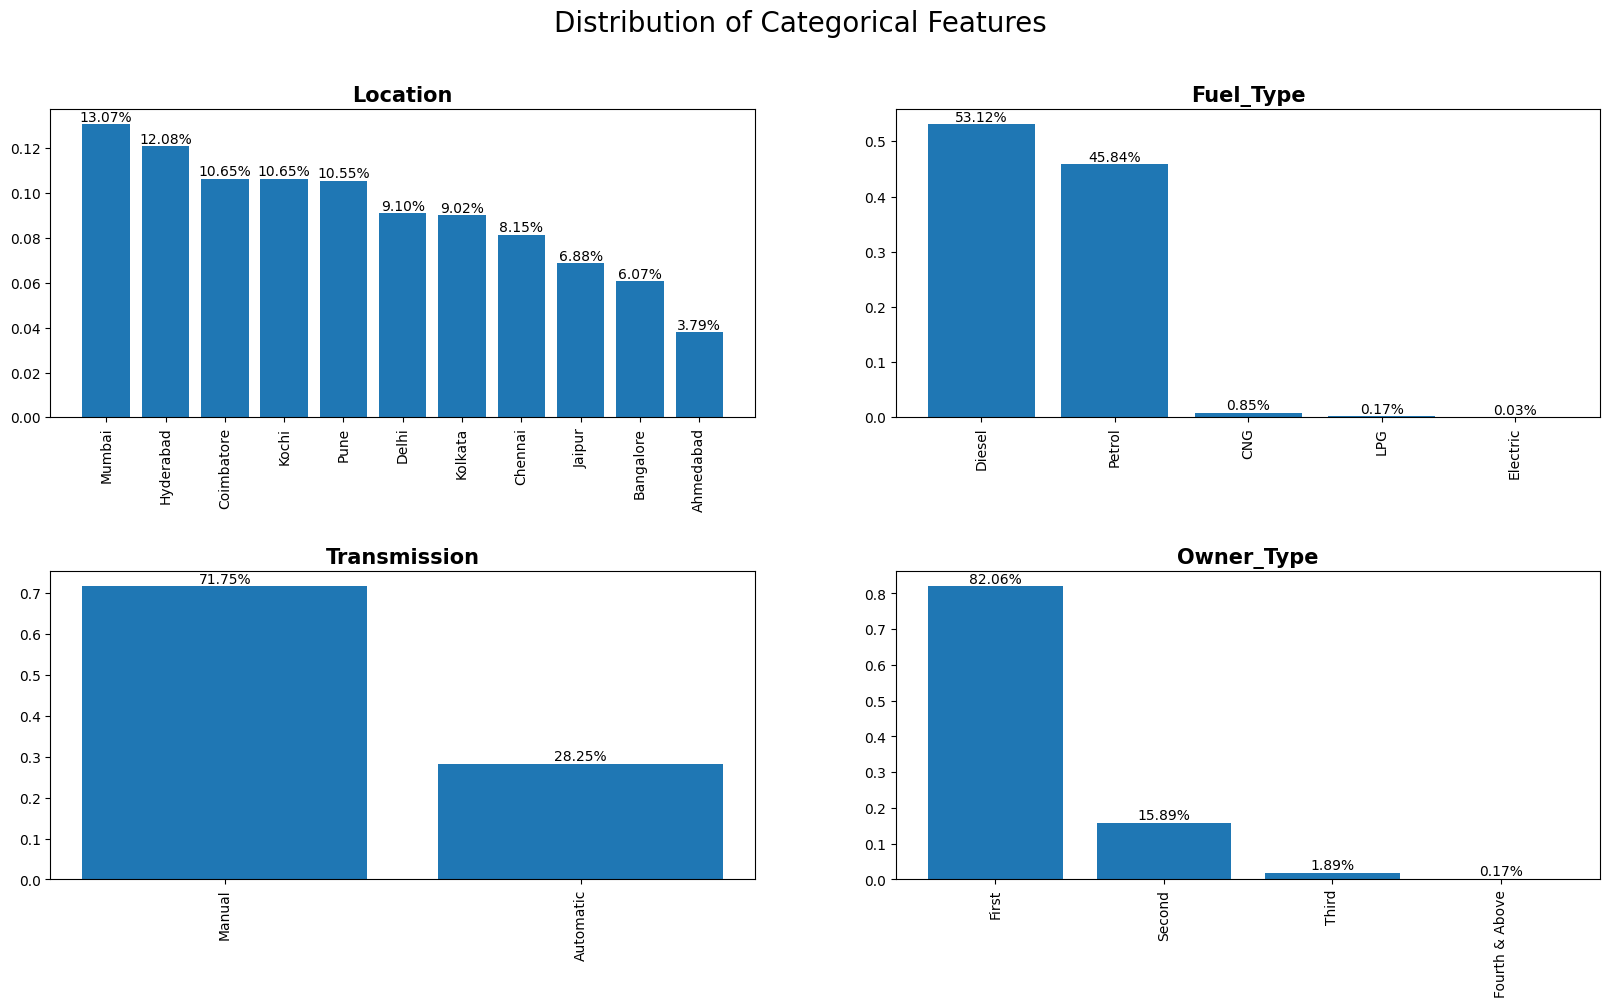

In [195]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Distribution of Categorical Features", fontsize=20)
for i, column in enumerate(categorical_columns):
    row, col = i // 2, i % 2  # Calculate row and column index for subplots
    percentage_distribution = df[column].value_counts(normalize=True)
    ax[row, col].bar(percentage_distribution.index, percentage_distribution.values)
    ax[row, col].set_title(column, fontsize=15, fontweight="bold")
    ax[row, col].tick_params(axis="x", labelrotation=90)
    for index, value in enumerate(percentage_distribution.values):
        ax[row, col].text(index, value, f"{value*100:.2f}%", ha="center", va="bottom")
plt.subplots_adjust(hspace=0.5)
plt.show()


#### Observations
- For categorical variable Location, we have 11 unique values. Around 13% of the cars are from Mumbai and 12% from Hyderabad. But in general the distribution is quite uniform.
- For categorical variable Fuel_Type, we have 5 unique values. Around 53% of the cars are Diesel and 46% Petrol. This means that those two fuel types represent almost the totality of the cars in the dataset.
- For categorical variable Transmission, we have 2 unique values. Around 72% of the cars have manual transmission and 28% automatic transmission.
- The Owner type variable have 4 unique values. Around 82% of the cars have first owner and 16% second owner. The other two categories are very small.


In [196]:
log_df = df.copy()

In [197]:
skewed_columns = ["Year", "Kilometers_Driven", "Power", "Price"]
for col in skewed_columns:
    log_df[col] = np.log(log_df[col])

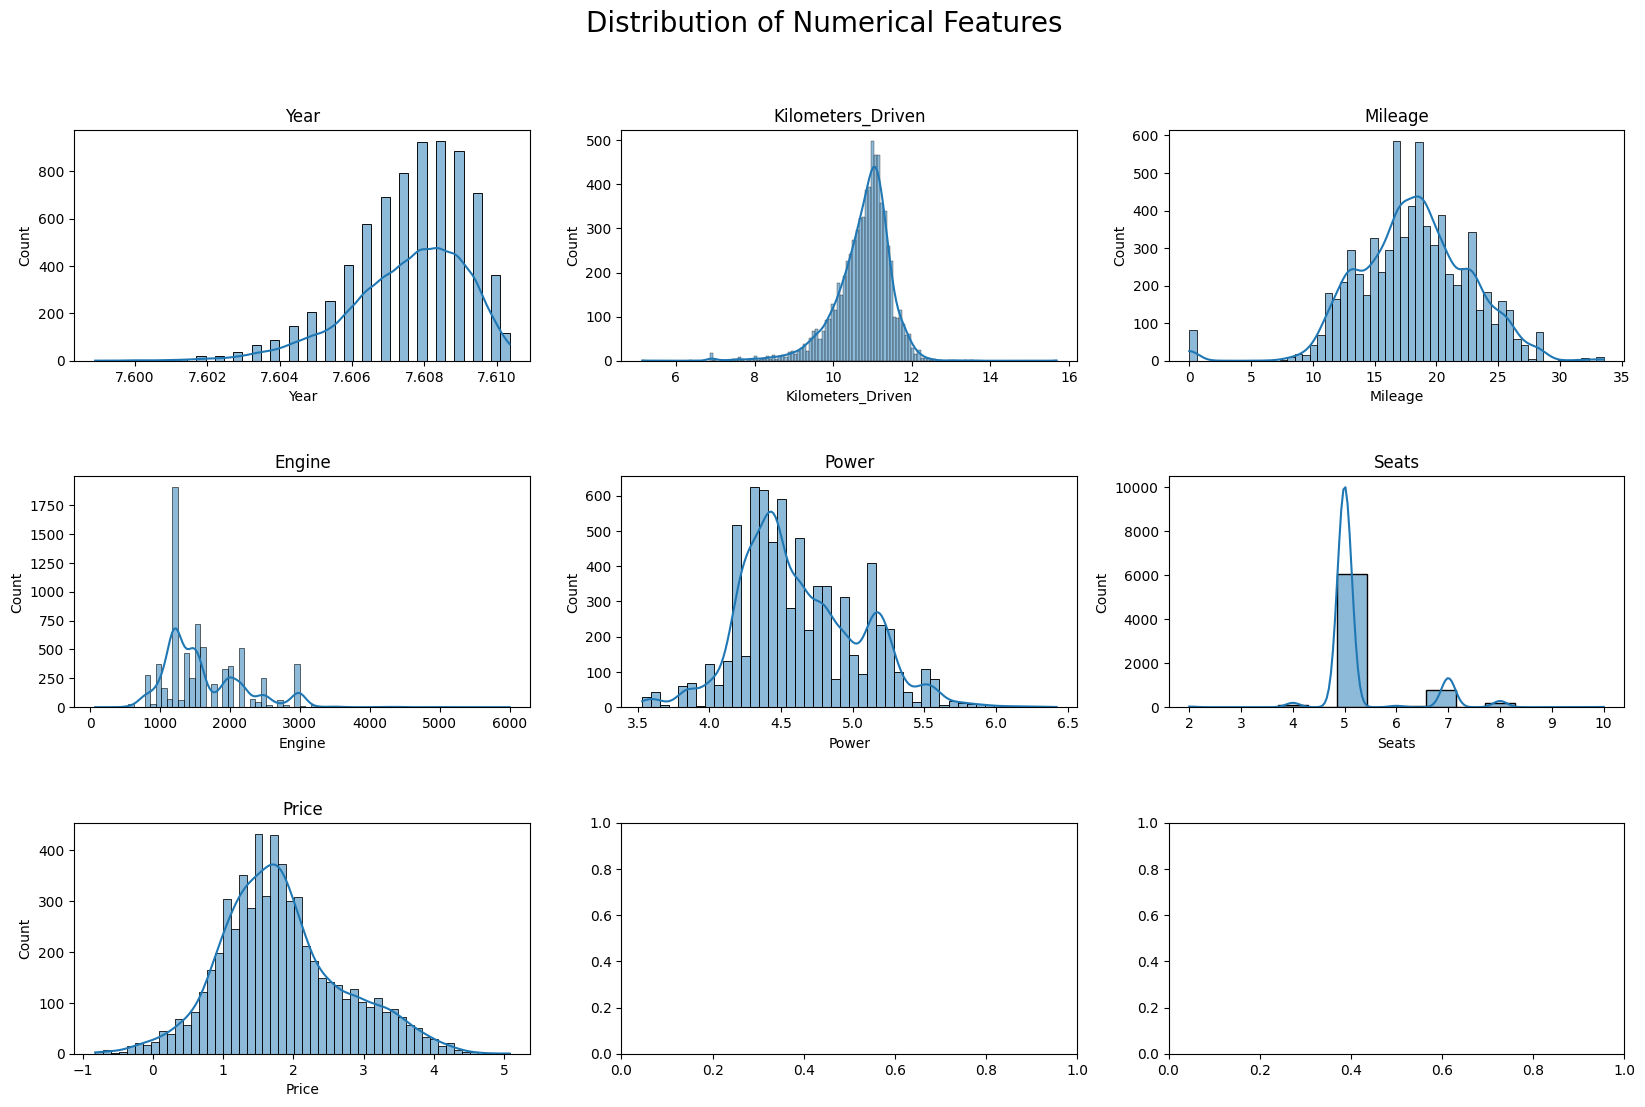

In [198]:
fig, ax = plt.subplots(3,3 ,figsize=(20, 12))
fig.suptitle("Distribution of Numerical Features", fontsize=20)
for i, variable in enumerate(numeric_columns):
    row = i // 3 
    col = i % 3
    sns.histplot(data=log_df, x=variable, ax=ax[row][col], kde=True).set_title(variable)

plt.subplots_adjust(hspace=0.5)
plt.show()

I have applied log transformation to those columns that were highly skewed. After doint it, we can identify that the skewness has been reduced but we still can see a slight skewness in some of the columns. 

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable "Location" and write your observations?

Correlation Matrix

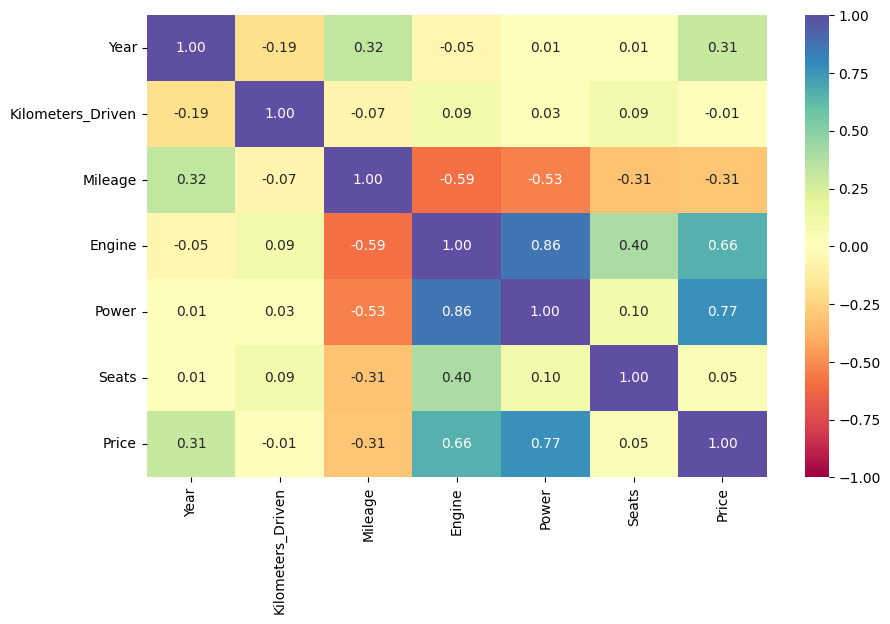

In [199]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot = True, cmap ="Spectral",vmin = -1, vmax = 1,  fmt=".2f")
plt.show()

#### Observations:

- Power and Engine is highly correlated with our target variable Price. But thow variables are highly correlated with each other. So we will drop Engine as bhp is more intuitive than engine.
- Year and Seats does not have much correlation with our target variable Price.
- Mileage and Kilometer_Driven is negatively correlated with our target variable Price.

Scatter plot for the log transformed values

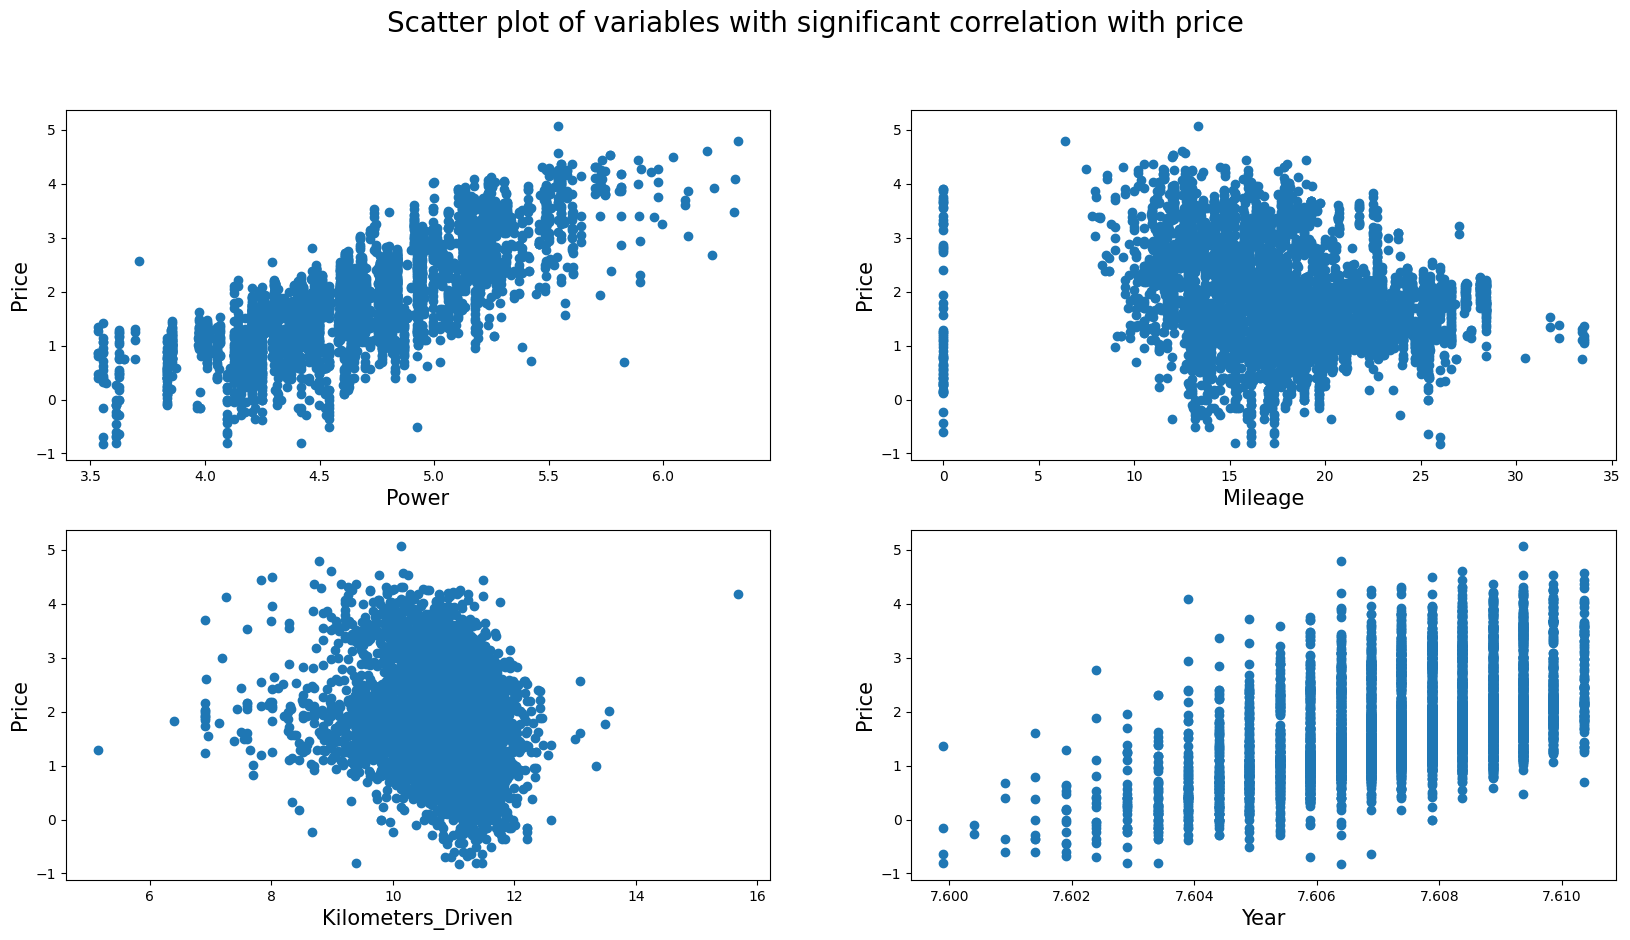

In [200]:
#variable with significant correlation with price
variables = ["Power","Mileage", "Kilometers_Driven", "Year"]

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle("Scatter plot of variables with significant correlation with price", fontsize=20)
for i, variable in enumerate(variables):
    row = i//2
    col = i%2
    ax[row, col].scatter(log_df[variable], log_df["Price"])
    ax[row, col].set_xlabel(variable, fontsize=15)
    ax[row, col].set_ylabel("Price", fontsize=15)
plt.subplot
plt.show()

Using the log values we can see the following relationships:
- The price of the car is positively correlated with the year of the car. This is because the newer the car, the more expensive it is.
- The price of the car is positively correlated with the power of the car. This is because the more powerful the car, the more expensive it is.
- The price of the car is not correlated with the mileage of the car and the kilometers driven.

Box plot for Location and Price

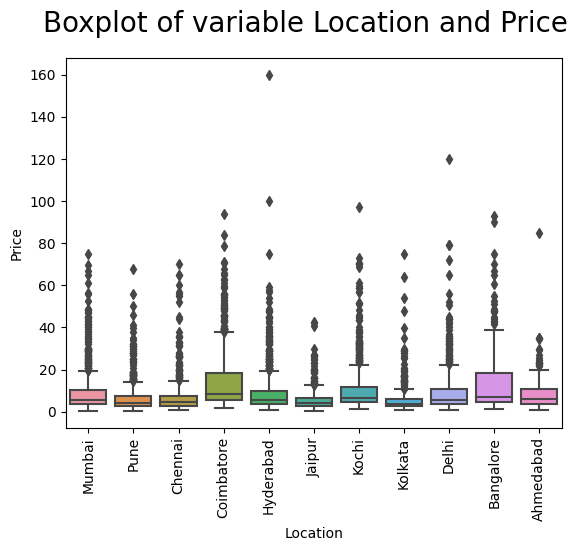

In [201]:
plt.suptitle("Boxplot of variable Location and Price", fontsize=20)
sns.boxplot(x="Location", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

Analyzing this boxplot we can see there are many outliers spread accross the data. Additionally, we can find the following observations:
- The whisker for the cities Coimbatore and Bangalore are longer than the other cities, which means that the data is more spread out in these cities. This means there are really big differences between the prices of used cars in these cities.
- Most of the cities have a box that is more or less the same size, which means that the data is more or less spread out in the same way in these cities. This means there are not really big differences between the prices of used cars in these cities except for the high number of outliers. 

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [202]:
df["Model"] = df["Name"].str.split().str[0]
df.drop(["Name"], axis=1, inplace=True)
df.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
7107,Mumbai,2015,8300,Petrol,Manual,First,21.10,814.0,55.20,5.0,NaN,Hyundai
4306,Jaipur,2008,82203,Petrol,Manual,First,19.81,1086.0,68.05,5.0,1.80,Hyundai
6644,Bangalore,2015,68178,Diesel,Manual,First,21.38,1396.0,88.70,5.0,NaN,Hyundai
4861,Hyderabad,2017,2530,Petrol,Manual,First,24.70,796.0,47.30,5.0,3.30,Maruti
5497,Hyderabad,2011,127887,Diesel,Manual,First,21.10,1248.0,73.90,5.0,2.95,Maruti


Best sellers models

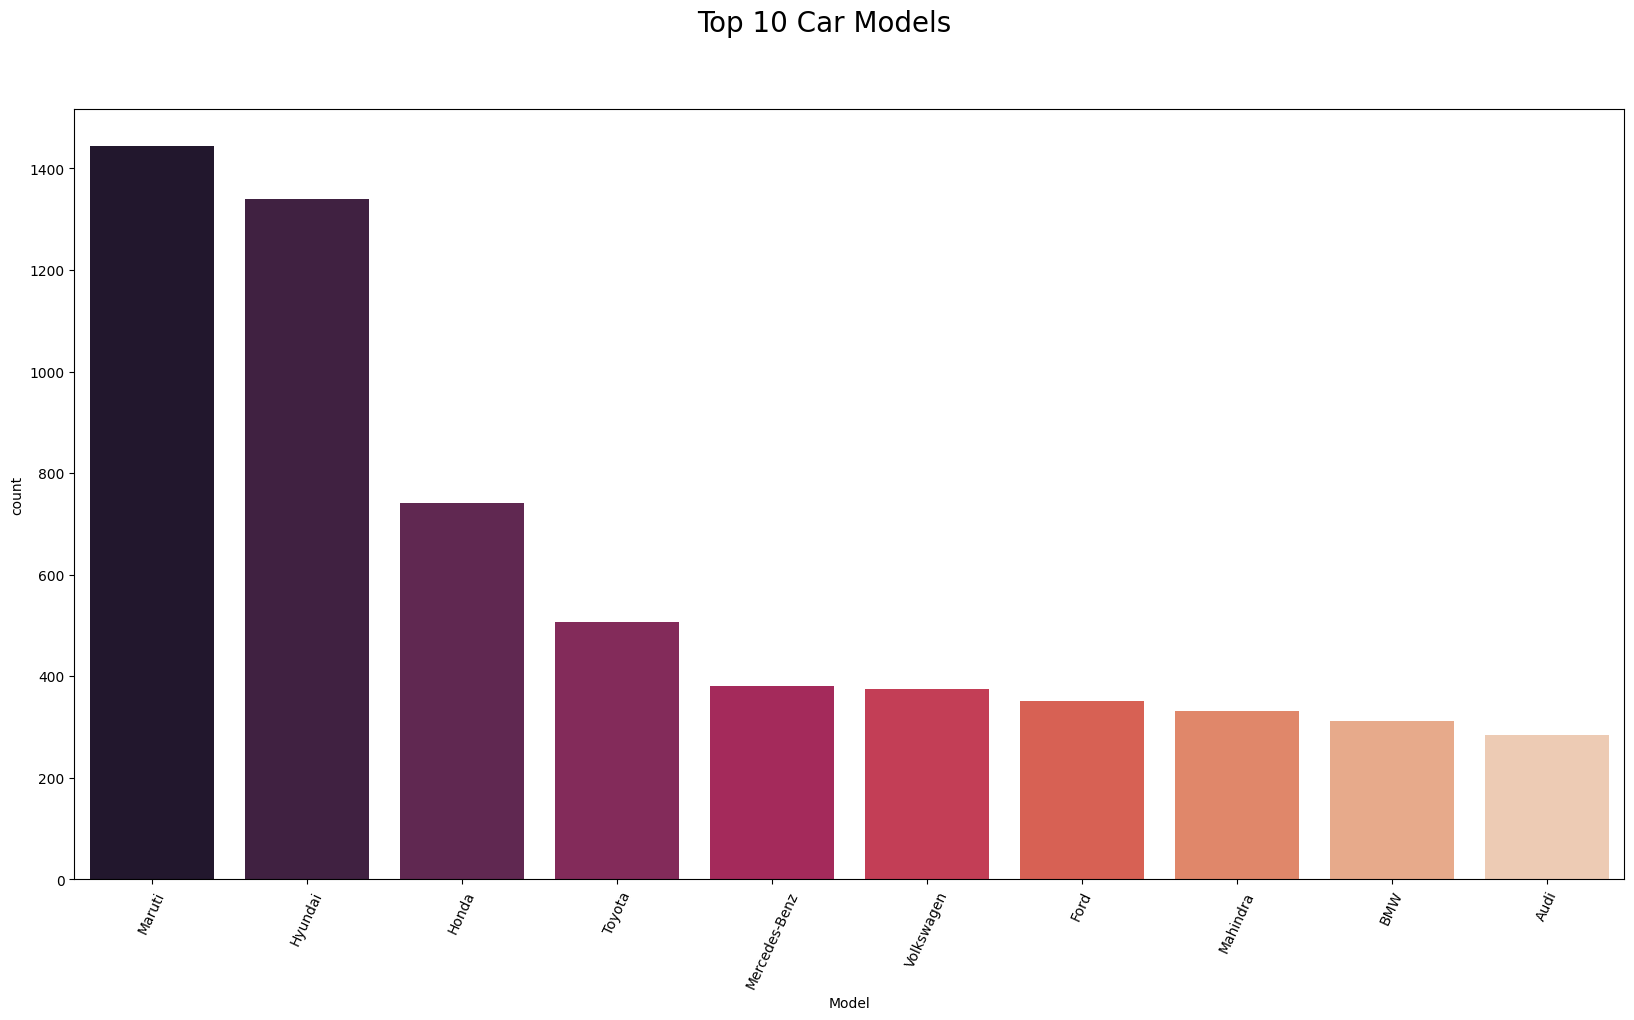

In [203]:
plt.figure(figsize=(20,10))
plt.suptitle("Top 10 Car Models", fontsize=20)
sns.countplot(x="Model", data=df, palette = "rocket" , order = df["Model"].value_counts().iloc[:10].index)
plt.xticks(rotation=65)
plt.show()

After performing this analysis we can see that Maruti is the best selling car brand in the market followed by Hyundai and Honda.

In [204]:
#Unique model names
print("Unique model names: ", len(df["Model"].unique()))

Unique model names:  33


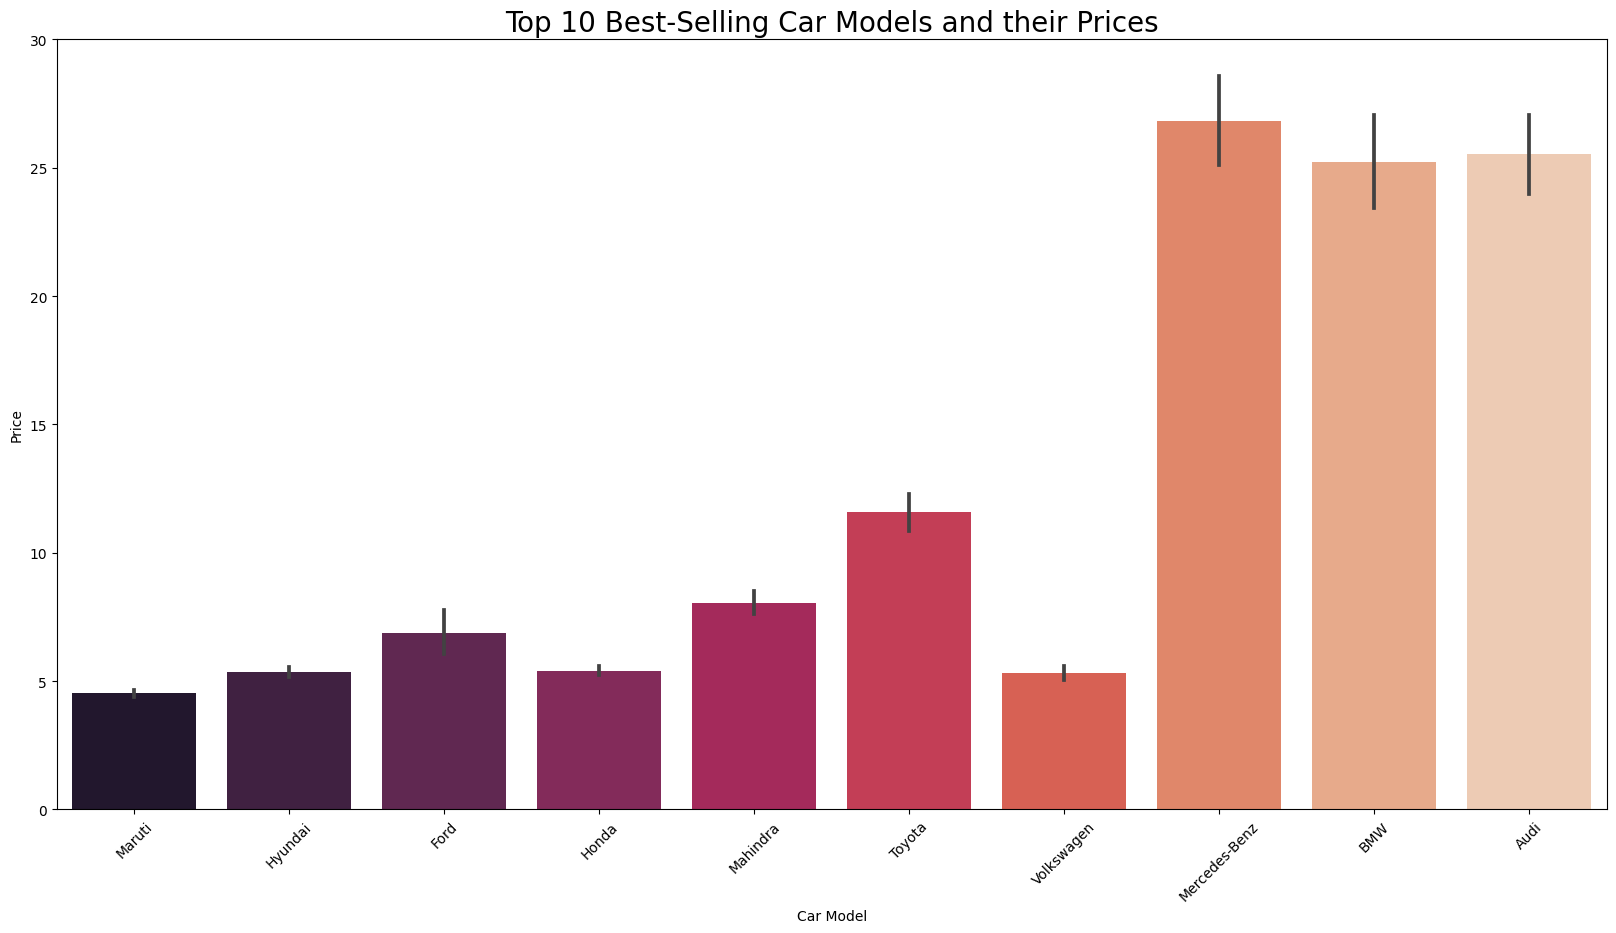

In [205]:
#We identify the top 10 best-selling car models 
top_10_best_selling_models = df["Model"].value_counts().nlargest(10).index
#New dataframe with only the top 10 best-selling car models and sorted by price
filtered_df = df[df["Model"].isin(top_10_best_selling_models)].sort_values(by="Price")

plt.figure(figsize=(20, 10))
sns.barplot(x="Model", y="Price", data=filtered_df, palette="rocket")
plt.xlabel("Car Model")
plt.ylabel("Price")
plt.title("Top 10 Best-Selling Car Models and their Prices", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [206]:
maruti_mean_price = df[df["Model"] == "Maruti"]["Price"].mean()
print("Mean price of Maruti cars: {:.2f} ".format(maruti_mean_price))
hyundai_mean_price = df[df["Model"] == "Hyundai"]["Price"].mean()
print("Mean price of Hyundai cars: {:.2f} ".format(hyundai_mean_price))
mercedes_mean_price = df[df["Model"] == "Mercedes-Benz"]["Price"].mean()
print("Mean price of Mercedes-Benz cars: {:.2f}".format(mercedes_mean_price))

Mean price of Maruti cars: 4.52 
Mean price of Hyundai cars: 5.34 
Mean price of Mercedes-Benz cars: 26.81


After this analysis we found there is a huge difference between the price of the best selling brand and the other brands. Maruti cost around 4.5 INR meanwhile Mercedes which is the most expensive brand cost 26.82 INR

### **Missing value treatment**

In [207]:
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result with two decimals
print("Percentage of null values in each column:")
print(null_percentage.apply(lambda x: "{:.2f}%".format(x)))

Percentage of null values in each column:
Location              0.00%
Year                  0.00%
Kilometers_Driven     0.00%
Fuel_Type             0.00%
Transmission          0.00%
Owner_Type            0.00%
Mileage               0.03%
Engine                0.63%
Power                 2.41%
Seats                 0.73%
Price                17.00%
Model                 0.00%
dtype: object


First, we calculate the number of missing values. Previously, we have already deleted the columns with a high number of missing values. Now, we will replace the missing values in the other columns by the median. We are going to use because those columns are already skewed and the median is less sensitive to outliers than the mean.

In [208]:
columns_with_missing_values = ["Price", "Engine", "Power", "Seats", "Mileage"]
for column in columns_with_missing_values:
    df[column].fillna(df[column].median(), inplace=True)

In [209]:
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result with two decimals
print("Percentage of null values in each column:")
print(null_percentage.apply(lambda x: "{:.2f}%".format(x)))

Percentage of null values in each column:
Location             0.00%
Year                 0.00%
Kilometers_Driven    0.00%
Fuel_Type            0.00%
Transmission         0.00%
Owner_Type           0.00%
Mileage              0.00%
Engine               0.00%
Power                0.00%
Seats                0.00%
Price                0.00%
Model                0.00%
dtype: object


No more missing values after the changes

### **Dropping the columns that are not significant for the model building**

All those variables that are not relevant for the model are dropped.

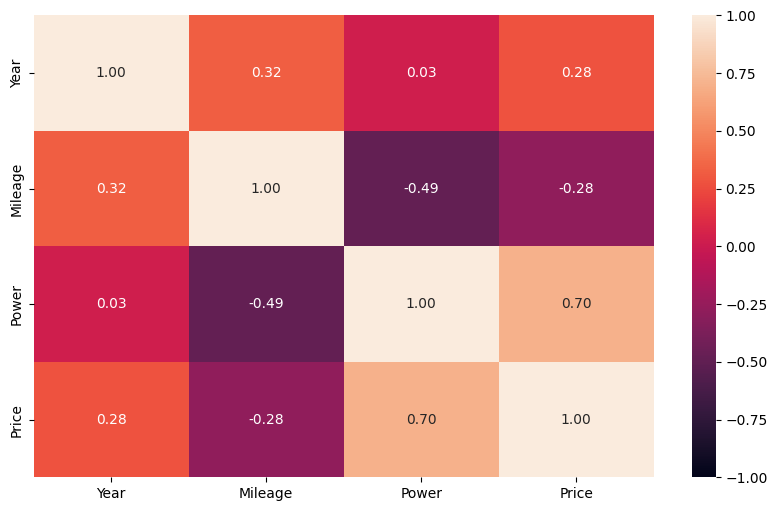

In [210]:
df.drop(["Kilometers_Driven","Engine","Seats"], axis=1, inplace=True)
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
#Let´s display again the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot = True, cmap ="rocket",vmin = -1, vmax = 1,  fmt=".2f")
plt.show()

We keep just those variables that are significat for the model building

### **Outliers treatment**

In [211]:
for k, v in df[numeric_columns].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)
    v_col = v[(v <= fence_low) | (v >= fence_high)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Year outliers = 0.80%
Column Mileage outliers = 1.37%
Column Power outliers = 3.78%
Column Price outliers = 13.54%


In [212]:
df.shape

(7252, 9)

In [213]:
outliers_column = ["Year","Mileage","Power","Price"]

In [214]:
for column in outliers_column:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - (1.5 * iqr)
    fence_high = q3 + (1.5 * iqr)
    df[column] = np.clip(df[column], fence_low, fence_high)
     #df = df[(df[column] >= fence_low) & (df[column] <= fence_high)]


In [215]:
df.shape

(7252, 9)

After running this logic I have removed all the outliers from the dataset. Now the dataset is ready for further analysis.

### **Log Transformation**

In [216]:
scaled_df = df.copy()

In [217]:
scaler = StandardScaler()
scaled_df[numeric_columns] = scaler.fit_transform(scaled_df[numeric_columns])

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

- Year, Mileage, Power are the most important features to predict the price of a car.
- The number of outliers and missing values were not very high and applying the proper techniques to deal with them we have a good dataset to work with.
- There are huge differences between the prices of cars if we compare the different brands.But the majority of the used car prices are around 9 INR
- Most of the cars are 10 years old and have a mileage of 18 kmp with a power of 112 bhp and have 5 seats.
- The majority of cars use diesel or petrol as fuel, being others fuel types very rare.
- The majority of cars have a manual transmission.
- The distribution among the cities is very similar, with Mumbai being the city with more cars.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version "price_log" for modeling.
2. Before we proceed to the model, we"ll have to encode categorical features. We will drop categorical features like Name. 
3. We"ll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop "Name","Price","price_log","Kilometers_Driven" from X before splitting?

- Name because previously I had split the data to obtain the model name. And the rest of information I consider is not relevant for the model.
- Price because it is the target variable.
- Kilometers Driven becauste it does not have a significant correlation with the target variable.
- Price_log because it is the target variable

### **Encoding strategy**

In [218]:
one_hot_columns = ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Model"]
one_hot_encoded_df = pd.get_dummies(scaled_df, columns=one_hot_columns, drop_first=True)
new_columns = [col for col in one_hot_encoded_df.columns if col not in scaled_df.columns]
one_hot_encoded_df[new_columns] = one_hot_encoded_df[new_columns].astype(int)

In [219]:
one_hot_encoded_df.sample(5)

,Year,Mileage,Power,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Model_Nissan,Model_OpelCorsa,Model_Porsche,Model_Renault,Model_Skoda,Model_Smart,Model_Tata,Model_Toyota,Model_Volkswagen,Model_Volvo
811,0.506047,1.392762,-0.256849,-0.318843,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5673,1.756636,-0.070931,0.557112,1.988641,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6515,-0.744542,-0.614589,2.593647,-0.285625,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2330,-0.431895,-0.454280,-0.770471,-1.104218,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
551,0.818695,2.296534,-0.476662,0.630251,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Split the Data**

In [220]:
y = one_hot_encoded_df["Price"]
x = one_hot_encoded_df.drop(["Price"], axis=1)

In [221]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5801, 53), (1451, 53), (5801,), (1451,))

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Linear Regression**

In [222]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [223]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [224]:
linear_regression_model_score = model_performance_regression(linear_regression_model, x_train, y_train)
linear_regression_model_score

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.528564,0.369837,0.71815,0.71555,-25.510591


**Observations**
- The RMSE is 0.52 which is a low value and means that there is a small difference between the actual and predicted values.
- The MAE is value is 0.36 is a low value and as well measure the average error between the actual and predicted values. A low value like this means that the model is good at predicting the price of the used cars.
- The R-squared value is 0.72 which is a high value and means that the model is able to explain 72% of the variance in the target variable.
- The Adj. R-squared value is 0.72 which is a high value and means that the model is able to explain 72% of the variance in the target variable. The small difference between the R-squared and Adj. R-squared values means that there is no overfitting in the model.

Overall, these evaluation metrics suggest that the model performs reasonably well. The R-squared values indicate that a significant portion of the variance in the target variable is explained by the model. The RMSE and MAE values are relatively low, indicating that the model"s predictions are close to the actual values


In [225]:
linear_regression_model_ols = sm.OLS(y_train, x_train).fit()
linear_regression_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     293.1
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:16:39   Log-Likelihood:                -4532.4
No. Observations:                5801   AIC:                             9167.
Df Residuals:                    5750   BIC:                             9507.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                          0.3519      0.009     38.855      0.000       0.334       0.370
Mileage                      -0.1183      0.012    -10.022      0.000      -0.141      -0.095
Power                         0.3502      0.015     23.397      0.000       0.321       0.380
Location_Bangalore            0.0480      0.046      1.052      0.293      -0.041       0.137
Location_Chennai              0.0194      0.043      0.450      0.653      -0.065       0.104
Location_Coimbatore           0.0730      0.042      1.751      0.080      -0.009       0.155
Location_Delhi               -0.1156      0.042     -2.722      0.007      -0.199      -0.032
Location_Hyderabad            0.0801      0.041      1.960      0.050    -1.6e-05       0.160
Location_Jaipur              -0.0165      0.045     -0.372      0.710      -0.104       0.071
Location_Kochi               -0.0387      0.042     -0.926      0.355      -0.121       0.043
Location_Kolkata             -0.1921      0.042     -4.525      0.000      -0.275      -0.109
Location_Mumbai              -0.0275      0.041     -0.678      0.498      -0.107       0.052
Location_Pune                -0.0275      0.042     -0.661      0.509      -0.109       0.054
Fuel_Type_Diesel              0.2664      0.074      3.622      0.000       0.122       0.411
Fuel_Type_Electric            1.7282      0.384      4.497      0.000       0.975       2.482
Fuel_Type_LPG                 0.0726      0.183      0.396      0.692      -0.287       0.432
Fuel_Type_Petrol             -0.0166      0.074     -0.224      0.822      -0.161       0.128
Transmission_Manual          -0.1589      0.024     -6.706      0.000      -0.205      -0.112
Owner_Type_Fourth & Above    -0.0201      0.178     -0.113      0.910      -0.370       0.330
Owner_Type_Second            -0.0398      0.021     -1.911      0.056      -0.081       0.001
Owner_Type_Third             -0.1197      0.054     -2.206      0.027      -0.226      -0.013
Model_Audi                    0.5372      0.090      5.977      0.000       0.361       0.713
Model_BMW                     0.4670      0.091      5.127      0.000       0.288       0.646
Model_Bentley                 0.3757      0.386      0.973      0.330      -0.381       1.133
Model_Chevrolet              -0.3638      0.097     -3.750      0.000      -0.554      -0.174
Model_Datsun                 -0.3724      0.171     -2.178      0.029      -0.708      -0.037
Model_Fiat                   -0.3306      0.129     -2.567      0.010      -0.583      -0.078
Model_Force                   0.2855      0.319      0.896      0.370      -0.339       0.910
Model_Ford                   -0.1578      0.090     -1.755      0.079      -0.334       0.018
Model_Hindustan            1.503e-15   1.92e-15      0.784      0.433   -2.

As there are several variables with p-value > 0.05, we will drop them one by one and check the model performance.

First, we test it removing all the location variables where most of the p-values are > 0.05.

In [226]:
variables_with_high_p_value = ["Owner_Type_Fourth & Above","Location_Bangalore","Location_Chennai",
                               "Location_Jaipur","Fuel_Type_LPG","Fuel_Type_Petrol","Model_Isuzu","Model_Force",
                               "Model_Hindustan","Model_Lamborghini","Model_ISUZU","Model_Mitsubishi",
                               "Model_Volvo","Model_Smart","Model_OpelCorsa","Model_Bentley","Location_Pune","Location_Kochi",
                               "Location_Mumbai"]

x_train_new = x_train.drop(columns=variables_with_high_p_value)
x_test_new = x_test.drop(columns=variables_with_high_p_value)

In [227]:
linear_regression_model_ols2 = sm.OLS(y_train, x_train_new).fit()
linear_regression_model_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              430.5
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                        0.00
Time:                        12:16:39   Log-Likelihood:                         -4540.5
No. Observations:                5801   AIC:                                      9149.
Df Residuals:                    5767   BIC:                                      9376.
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year                    0.3481      0.009     39.893      0.000       0.331       0.365
Mileage                -0.1163      0.011    -10.238      0.000      -0.139      -0.094
Power                   0.3536      0.015     23.978      0.000       0.325       0.383
Location_Coimbatore     0.0876      0.024      3.706      0.000       0.041       0.134
Location_Delhi         -0.1026      0.025     -4.066      0.000      -0.152      -0.053
Location_Hyderabad      0.0944      0.023      4.157      0.000       0.050       0.139
Location_Kolkata       -0.1783      0.025     -7.036      0.000      -0.228      -0.129
Fuel_Type_Diesel        0.2852      0.018     15.480      0.000       0.249       0.321
Fuel_Type_Electric      1.7609      0.377      4.668      0.000       1.021       2.500
Transmission_Manual    -0.1576      0.023     -6.842      0.000      -0.203      -0.112
Owner_Type_Second      -0.0340      0.021     -1.649      0.099      -0.074       0.006
Owner_Type_Third       -0.1165      0.054     -2.160      0.031      -0.222      -0.011
Model_Audi              0.5059      0.042     11.908      0.000       0.423       0.589
Model_BMW               0.4308      0.043     10.033      0.000       0.347       0.515
Model_Chevrolet        -0.3969      0.053     -7.470      0.000      -0.501      -0.293
Model_Datsun           -0.3907      0.149     -2.614      0.009      -0.684      -0.098
Model_Fiat             -0.3686      0.100     -3.686      0.000      -0.565      -0.173
Model_Ford             -0.1875      0.039     -4.773      0.000      -0.265      -0.111
Model_Honda            -0.1872      0.029     -6.557      0.000      -0.243      -0.131
Model_Hyundai          -0.1452      0.026     -5.552      0.000      -0.196      -0.094
Model_Jaguar            0.4086      0.087      4.708      0.000       0.238       0.579
Model_Jeep              0.3882      0.133      2.908      0.004       0.127       0.650
Model_Land              0.6684      0.077      8.633      0.000       0.517       0.820
Model_Mahindra         -0.1517      0.044     -3.486      0.000      -0.237      -0.066
Model_Maruti           -0.1030      0.027     -3.837      0.000      -0.156      -0.050
Model_Mercedes-Benz     0.4501      0.038     11.756      0.000       0.375       0.525
Model_Mini              1.1874      0.112     10.642      0.000       0.969       1.406
Model_Nissan           -0.2519      0.060     -4.184      0.000      -0.370      -0.134
Model_Porsche           0.8243      0.140      5.878      0.000       0.549       1.099
Model_Renault          -0.2131      0.052     -4.137      0.000      -0.314      -0.112
Model_Skoda            -0.1162      0.045     -2.606      0.009      -0.204     

After performing the deletion, the model performance has worsen. So we will keep all the variables.

### **Multicollinearity**

In [228]:
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    vif = vif.sort_values(by="VIF", ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

print(checking_vif(x_train))

/Users/manueljimenezlopez/Documents/mit-course/final-project/venvfinal/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                      feature        VIF
0                Model_Maruti  28.436370
1            Fuel_Type_Petrol  27.805745
2            Fuel_Type_Diesel  27.728515
3               Model_Hyundai  27.075195
4                 Model_Honda  15.802519
5                Model_Toyota  11.119166
6         Model_Mercedes-Benz   8.620491
7            Model_Volkswagen   8.565419
8              Model_Mahindra   7.989373
9                  Model_Ford   7.971656
10                  Model_BMW   7.241989
11                 Model_Audi   6.592490
12                 Model_Tata   5.553457
13                Model_Skoda   4.860748
14                      Power   4.659091
15              Model_Renault   4.313611
16            Model_Chevrolet   4.074066
17            Location_Mumbai   3.884704
18         Location_Hyderabad   3.588007
19        Location_Coimbatore   3.481509
20             Location_Kochi   3.405725
21              Location_Pune   3.337321
22               Model_Nissan   3.192027
23           Loc

There are several variables with high VIF values but as we should not consider VIF for dummy variables, we will not drop any of the variables.

### **Ridge/Lasso regression**

In [229]:
ridge_model = Ridge() 
ridge_model.fit(x_train, y_train)

ridge_reg = model_performance_regression(ridge_model, x_test, y_test) 
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.498311,0.355969,0.760037,0.750933,-26.727467


In this first iteration of the Ridge model we are seeing the following results:
- RMSE of 0.49 which is a really low value, meaning that the model, on average, the predictions are approximately 0.49 units away from the actual values. 
- MAE value of 0.35 suggests that on average, your predictions are about 0.35 units away from the actual value which is a really good value
- R2 value of 0.76 suggests that about 76% of the variation in the target variable can be explained using the model. 
- The Adj. R2 value of 0.75 indicates that after adjusting for the number of predictors, about 75% of the variability in used car prices can be explained by the model. It is a lower value than the R2 value, which could mean we are overfitting the model.

In [230]:
folds = KFold(n_splits=10, shuffle=True, random_state=1) 
params = {"alpha":[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]} 
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring="r2", cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [231]:
model_cv.best_params_

{'alpha': 5}

In [232]:
ridge_model = Ridge(alpha=5)
ridge_model_tuned = ridge_model.fit(x_train, y_train)

In [233]:
ridge_model_tuned_score = model_performance_regression(ridge_model_tuned, x_test, y_test) 
ridge_model_tuned_score

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.497168,0.356676,0.761137,0.752075,-27.233836


After fine tunning the ridge model, the score is slightly better than the previous ridge iteration.

In [234]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
lasso_reg = model_performance_regression(lasso_model, x_test, y_test)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.017396,0.808784,-0.000285,-0.038234,-32.19842


For Lasso Model the first execution is given us inusual results, so we will try to run it again to see if we can get a better result using some hyperparameter tuning.

In [235]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {"alpha":[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring="r2", cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [236]:
model_cv.best_params_

{'alpha': 0.001}

In [237]:
lasso_model = Lasso(alpha=0.001)
lasso_model_tuned = lasso_model.fit(x_train, y_train)

In [238]:
lasso_model_tuned_score = model_performance_regression(lasso_model_tuned, x_test, y_test)
lasso_model_tuned_score

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.500091,0.360599,0.758319,0.74915,-28.856788


This time the Lasso Model exeuction has improved the results given us a similar results to the Ridge Model.

- Ridge is showing a similar performance compared to linear regression model
- After applying Ridge regression with an optimize α, the performance is practically the same which means that Ridge Regression does not help in improving the model
- Lasso regression has a poor performance compared to linear regression model. But after applying Lasso regression with an optimize α, the performance has improved but still not as good as linear regression model

### **Decision Tree**

In [239]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)
decision_tree_model_score = model_performance_regression(decision_tree_model, x_test, y_test)
decision_tree_model_score

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.642934,0.374237,0.600537,0.585382,-14.187393


**Observations**
- The RMSE value is 0.65 which means that on average the model predicts 0.65 points away from the actual value. Again, a good value.
- The MAE similar to the other MAE values of the other models is very low, in this case, 0.38, which means that on average the model predicts 0.38 points away from the actual value. Again, a good value.
- R-Squared value 0.58, which means that the model explains 58% of the variability of the response data around its mean. In this case, the worst value of the four models. We will try to improve this with hyperparameter tuning.
- Same regarding Adjusted R-Squared value, where we are seeing the worst value of the four models. We will try to improve this with hyperparameter tuning.

### **Random Forest Regressor**

In [240]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train)
random_forest_score = model_performance_regression(random_forest_model, x_test, y_test)
random_forest_score

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.49181,0.322973,0.766257,0.757389,-17.79869


**Observations**
- The RMSE value is 0.48, which means, on average the model predicts 0.48 points away from the actual value.
- MAE value is 0.32, like RMSE, the lower the value, the better the model. In this case, the model is 0.32 points away from the actual value.
- R2 value is 0.76 which means the model explains 76% of the variability of the response data around its mean.
- Adjusted R2 value is 0.76 which means the model explains 76% of the variability of the response data around its mean.
- The model is a good fit for the data but can be improved using hyperparameter tuning.

### **Hyperparameter Tuning: Decision Tree**

In [241]:
decision_tree_model_tuned = DecisionTreeRegressor(random_state = 7)

In [242]:
parameters = {"max_depth": np.arange(2, 10), 
              "criterion": ["friedman_mse", "absolute_error", "squared_error"],
              "min_samples_leaf": [5, 10, 20]
             } 

In [243]:
grid_obj = GridSearchCV(estimator = decision_tree_model_tuned, param_grid= parameters, scoring = "r2", cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

In [244]:
decision_tree_model_tuned = grid_obj.best_estimator_

In [245]:
decision_tree_model_tuned.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=9,
                      min_samples_leaf=10, random_state=7)

The hyperparameter tunning is done using GridSearchCV. The best parameters for decisiton tree are:

{criterion="friedman_mse", max_depth=9,min_samples_leaf=10, random_state=7}

In [246]:
decision_tree_model_tuned_score = model_performance_regression(decision_tree_model_tuned, x_test, y_test)
decision_tree_model_tuned_score

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.502037,0.348684,0.756435,0.747195,-20.894948


After running again the decision tree model with the new hyperparameters the results are as follow:
- RMSE of 0.50 which 0.15 lower than the previous model. 
- MAE of 0.34 which is 0.04 lower than the previous model.
- R2 of 0.75 which is 0.17 higher than the previous model.
- Adjusted R2 of 0.75 which is 0.17 higher than the previous model.

The results are much better than the previous model, which mean that the hyperparameters tuning was successful.

**Feature Importance**

In [247]:
print(pd.DataFrame(decision_tree_model_tuned.feature_importances_, columns = ["Importance"], index = x_train.columns).sort_values(by = "Importance", ascending = False))

                           Importance
Power                        0.742376
Year                         0.174529
Mileage                      0.027967
Transmission_Manual          0.010966
Model_Honda                  0.009988
Model_Audi                   0.006318
Model_Toyota                 0.004979
Location_Coimbatore          0.003733
Fuel_Type_Petrol             0.003096
Location_Kolkata             0.002236
Model_Mercedes-Benz          0.001814
Model_Mitsubishi             0.001792
Model_Hyundai                0.001721
Model_Mahindra               0.001690
Location_Mumbai              0.001346
Fuel_Type_Diesel             0.001289
Location_Hyderabad           0.001188
Model_Tata                   0.000783
Location_Kochi               0.000709
Location_Delhi               0.000464
Model_Chevrolet              0.000344
Model_Renault                0.000260
Location_Jaipur              0.000129
Owner_Type_Third             0.000122
Model_Volkswagen             0.000080
Model_BMW   

After running the feature importance logic we can see the most relevant features are the numeric variables we have keep for the model building. Power is the most important feature to predict the price of a car, followed by the age of the car and the mileage. 

### **Hyperparameter Tuning: Random Forest**

In [248]:
random_forest_model_tuned = RandomForestRegressor()

In [249]:
parameters = {"n_estimators": [100, 150, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [5,10,15],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
             } 

In [250]:
grid_obj = GridSearchCV(estimator = random_forest_model_tuned, param_grid = parameters, scoring = "r2", cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

In [251]:
random_forest_model_tuned = grid_obj.best_estimator_

In [252]:
random_forest_model_tuned.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt',
                      min_samples_split=15, n_estimators=200)

The Random Forest Regressor hyperparameters after executing GridSearchCV are:


{bootstrap=False, max_features="sqrt",min_samples_split=15, n_estimators=150}

In [253]:
random_forest_model_tuned_score = model_performance_regression(random_forest_model_tuned, x_test, y_test)
random_forest_model_tuned_score

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.467021,0.328327,0.789226,0.78123,-19.345413


As we already experienced with the Decision Tree tunning, the Random Forest Scores have improved compared with the previous execution

**Feature Importance**

In [254]:
print(pd.DataFrame(random_forest_model.feature_importances_, columns = ["Importance"], index = x_train.columns).sort_values(by = "Importance", ascending = False))

                           Importance
Power                        0.598123
Year                         0.164924
Mileage                      0.059207
Model_Mercedes-Benz          0.010952
Transmission_Manual          0.010104
Location_Hyderabad           0.009346
Location_Coimbatore          0.008842
Location_Mumbai              0.007965
Model_Land                   0.007444
Location_Kochi               0.007355
Owner_Type_Second            0.007154
Location_Delhi               0.007095
Location_Bangalore           0.007020
Model_Audi                   0.006975
Model_Toyota                 0.006684
Model_BMW                    0.006621
Location_Kolkata             0.006449
Model_Honda                  0.006065
Fuel_Type_Diesel             0.005871
Model_Mini                   0.005786
Location_Pune                0.005251
Location_Chennai             0.004984
Location_Jaipur              0.003944
Fuel_Type_Petrol             0.003708
Model_Hyundai                0.003168
Model_Mahind

Regarding the feature importance, we are seeing a similar distribution as the one we saw with the Decision Tree Model. The numeric columns are the most relevant being Power the most important column. To highlight something, we can see that those models less sold in the market are the ones that have less importance in the model. This is something that we can see in the Decision Tree Model as well.

In [255]:
dfs = [linear_regression_model_score, ridge_model_tuned_score, lasso_model_tuned_score, decision_tree_model_tuned_score, random_forest_model_tuned_score]
model_names = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest"]

In [256]:
for i in range(len(dfs)):
    dfs[i]["Model Name"] = model_names[i]

# Concatenate the DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

In [257]:
result_df.sort_values(by=["R-squared"], ascending=False)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,Model Name
4,0.467021,0.328327,0.789226,0.781230,-19.345413,Random Forest
1,0.497168,0.356676,0.761137,0.752075,-27.233836,Ridge Regression
2,0.500091,0.360599,0.758319,0.749150,-28.856788,Lasso Regression
3,0.502037,0.348684,0.756435,0.747195,-20.894948,Decision Tree
0,0.528564,0.369837,0.718150,0.715550,-25.510591,Linear Regression


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- After the testing of different models we can see the performance is good in general, being the best the Random Forest Regressor after hyperparameters tunning with a R2 value of 0.78. 
- We can see the performance of the models is similar but it required some tunning to get the best performance, meanwhile, linear regression was giving a good performance from the beginning.
- The performance of the models can be improved by adding more data, more features, and more hyperparameters tunning.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

- Power, Year and Mileage are the variables more correlated with the price of the car which mean those are the variables that will have a higher impact on the final price for the prediction model.
- There are many outliers in the data, which means that there are many cars that are not following the general trend of the data. This could be due to the fact that there are many different car brands and models in the data, and some of them are more expensive than others.
- Location is not a variable with huge impact on the price of the car as the distribution of the price is similar in all the locations.
- India is a market where the fuel type is highly dominated by old combustion engines, as the distribution of the fuel type is highly skewed towards diesel and petrol.


**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

- Random Forest Regressor is the best model so far. It has the highest R2 score and lowest RMSE score. This could be improved even more using more hyperparameter tuning and test it with more parameters options. Additionally, adding more features to the model could also improve the model performance.

### Executive Summary ###

- What are the most important findings from the analysis done in Milestone? What are the key takeaways and What are the key next steps? - Provide the final proposed model specifications

Based on the analysis done in Milestone, the most important findings are:
- Not all the variables are relevant for the model building so several variables were dropped and at the same time some feature engineering and data processing techniques were applied to the data set.
- The results after applying different models were good but it could be much better if we update the data set with more recent data.
- Additionally, it is possible to go deepeer in the analysis adding date columns to see the evolution over time and identify the relationship between models and engines. 
- As it is a market highly influenced by the price of the oil, it is important to add this variable to the model and see how it affects the demand of the cars.
- Another key element at least for me is the low relevance of environmental friendly fuel types. I would expect that the demand of this type of cars will increase over time.
- In my opinion, the best next steps to be taken is to update the data set with more recent data and add the variables mentioned above to the model so the model performance can be improved.

### Problem and Solution Summary ###
- Summary of the problem. What problem was being solved? - Explain the reason for the proposed solution design. What are the key points that describe the final proposed solution design? - How it would affect the problem/business? Why is this a 'valid' solution that is likely to solve the problem?

As mentioned before, the goal of this project was to identify a model that could predict the price of used cars in the indian market. After the analysis, Random Forest Regressor is the model with the higher performance. As it is a tree regressor model the variables that are more important to predict the price are the ones that are closer to the root of the tree. So those variables have a high relevante to determine the price of the car. The variables that are closer to the leaves of the tree are the ones that have less importance to determine the price of the car. The impact of this is that variables like year or power determine how well the model behaves which at the end makes sense.

This is a valid solution because the model is being impacted by variables which have a really impact to predict the car price

### Recommendations for Implementation ###


- What are some key recommendations to implement the solutions? - What are the key actionable for stakeholders? What is the expected benefit and/or costs? - What are the key risks and challenges? - What further analysis needs to be done or what other associated problems need to be solved?

The key recommendations after the analysis is that the power of the car and how old it is will me the critical element to determine the price of the car. As the majority of the population demand cars that are relatively new and have a good power. The key actionable for the stakeholders is to focus on those models which offer an engine power considered sufficient and that are not relatively old. The expected benefit is that the cars will be sold faster and the costs will be lower. The key risks and challenges are that the model is not 100% accurate and that the data is not complete. Further analysis needs to be done to determine the price of the car based on the model and the brand.

The outliers are not relevant for the analysis as they correspond to expensive models that for the bast majority of the population are not relevant.